In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
drive_path = '/content/drive/MyDrive/general_assembly/code/capstone/arabic_characters'

In [3]:
import pickle

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

np.random.seed(42)

In [4]:
with open(drive_path + '/arabcharsrgb.pkl', 'rb') as f:
    ac_data = pickle.load(f)

In [5]:
train_imgs = ac_data[0].copy()
test_imgs = ac_data[1].copy()
train_labels = ac_data[2].copy()
test_labels = ac_data[3].copy()
X_train = ac_data[4].copy()
X_test = ac_data[5].copy()
y_train = ac_data[6].copy()
y_test = ac_data[7].copy()
class_dict = ac_data[8].copy()

## CNN Model #2
This model will have a similar structure to the one outline in the paper but will incorporate Dropout layers and early stopping, as well as a few other adjustments.

In [6]:
# l2 value of 1e-8
# construct network
model = Sequential()

# Convolutional, Max Pooling, Dropout - 1, 2, 3
model.add(Conv2D(80, (5, 5), activation='relu', kernel_regularizer=l2(1e-8), input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

# Convolutional, Max Pooling, Dropout - 4, 5, 6
model.add(Conv2D(64, (5, 5), activation='relu', kernel_regularizer=l2(1e-8)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

# classification - 7, 8
model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_regularizer=l2(1e-8)))
model.add(Dense(28, activation='softmax'))

# early stopping callback
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1)

# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=30)

Epoch 1/30
210/210 [==============================] - 8s 34ms/step - loss: 1.3370 - accuracy: 0.5861 - val_loss: 0.6035 - val_accuracy: 0.8143
Epoch 2/30
210/210 [==============================] - 7s 32ms/step - loss: 0.4877 - accuracy: 0.8380 - val_loss: 0.4032 - val_accuracy: 0.8735
Epoch 3/30
210/210 [==============================] - 7s 32ms/step - loss: 0.3127 - accuracy: 0.8916 - val_loss: 0.3531 - val_accuracy: 0.8860
Epoch 4/30
210/210 [==============================] - 6s 31ms/step - loss: 0.2245 - accuracy: 0.9235 - val_loss: 0.3363 - val_accuracy: 0.8991
Epoch 5/30
210/210 [==============================] - 7s 31ms/step - loss: 0.1662 - accuracy: 0.9456 - val_loss: 0.2947 - val_accuracy: 0.9167
Epoch 6/30
210/210 [==============================] - 7s 32ms/step - loss: 0.1434 - accuracy: 0.9503 - val_loss: 0.2918 - val_accuracy: 0.9223
Epoch 7/30
210/210 [==============================] - 7s 32ms/step - loss: 0.1048 - accuracy: 0.9644 - val_loss: 0.3312 - val_accuracy: 0.9089

In [8]:
def plot_training(model_history=history):
    plt.figure(figsize=(8,10))

    plt.subplot(2,1,1)
    plt.title('Model Loss', fontsize=16)
    plt.xlabel('Number of Epochs', fontsize=12)
    plt.plot(model_history.history['loss'], label='Train Loss')
    plt.plot(model_history.history['val_loss'], label='Val Loss')
    plt.legend()

    plt.subplot(2,1,2)
    plt.title('Model Accuracy', fontsize=16)
    plt.xlabel('Number of Epochs', fontsize=12)
    plt.plot(model_history.history['accuracy'], label='Train Accuracy')
    plt.plot(model_history.history['val_accuracy'], label='Val Accuracy')
    plt.legend()

    plt.subplots_adjust(hspace=0.5) 
    plt.show()

    return

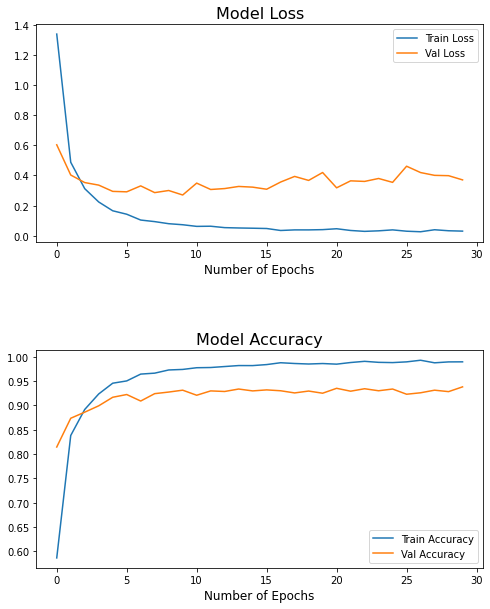

In [9]:
plot_training()

In [10]:
model.evaluate(X_test, y_test)

105/105 [==============================] - 1s 8ms/step - loss: 0.3709 - accuracy: 0.9381


[0.37087899446487427, 0.938095211982727]

## Model Performance
We're seeing slight improvement with this model - loss of 0.3709 and accuracy of 93.81%

In [11]:
model.save(drive_path + 'models/cnn_2.h5')